In [1]:
from FISHClass.utils.evaluation import get_top_model
from FISHClass.datasets import MYCN
from FISHClass.utils.device import best_gpu
from torch.utils.data import DataLoader
from FISHClass.utils.visualize import bbox_on_image, gridPlot
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [34]:
device = best_gpu()
model = torch.load(get_top_model("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/TRAIN_RESULTS/FASTER-R-CNN/EXP_2"))["model"]
sample = "SK-N-SH"
dataset = MYCN(f"/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/CELLINES/{sample}/{sample}.h5", sample, transform=None, norm_type=model.norm_type, channels=model.channels, mask=model.mask)#model.mask)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

 16%|█▋        | 31/188 [00:20<01:42,  1.54it/s]


512


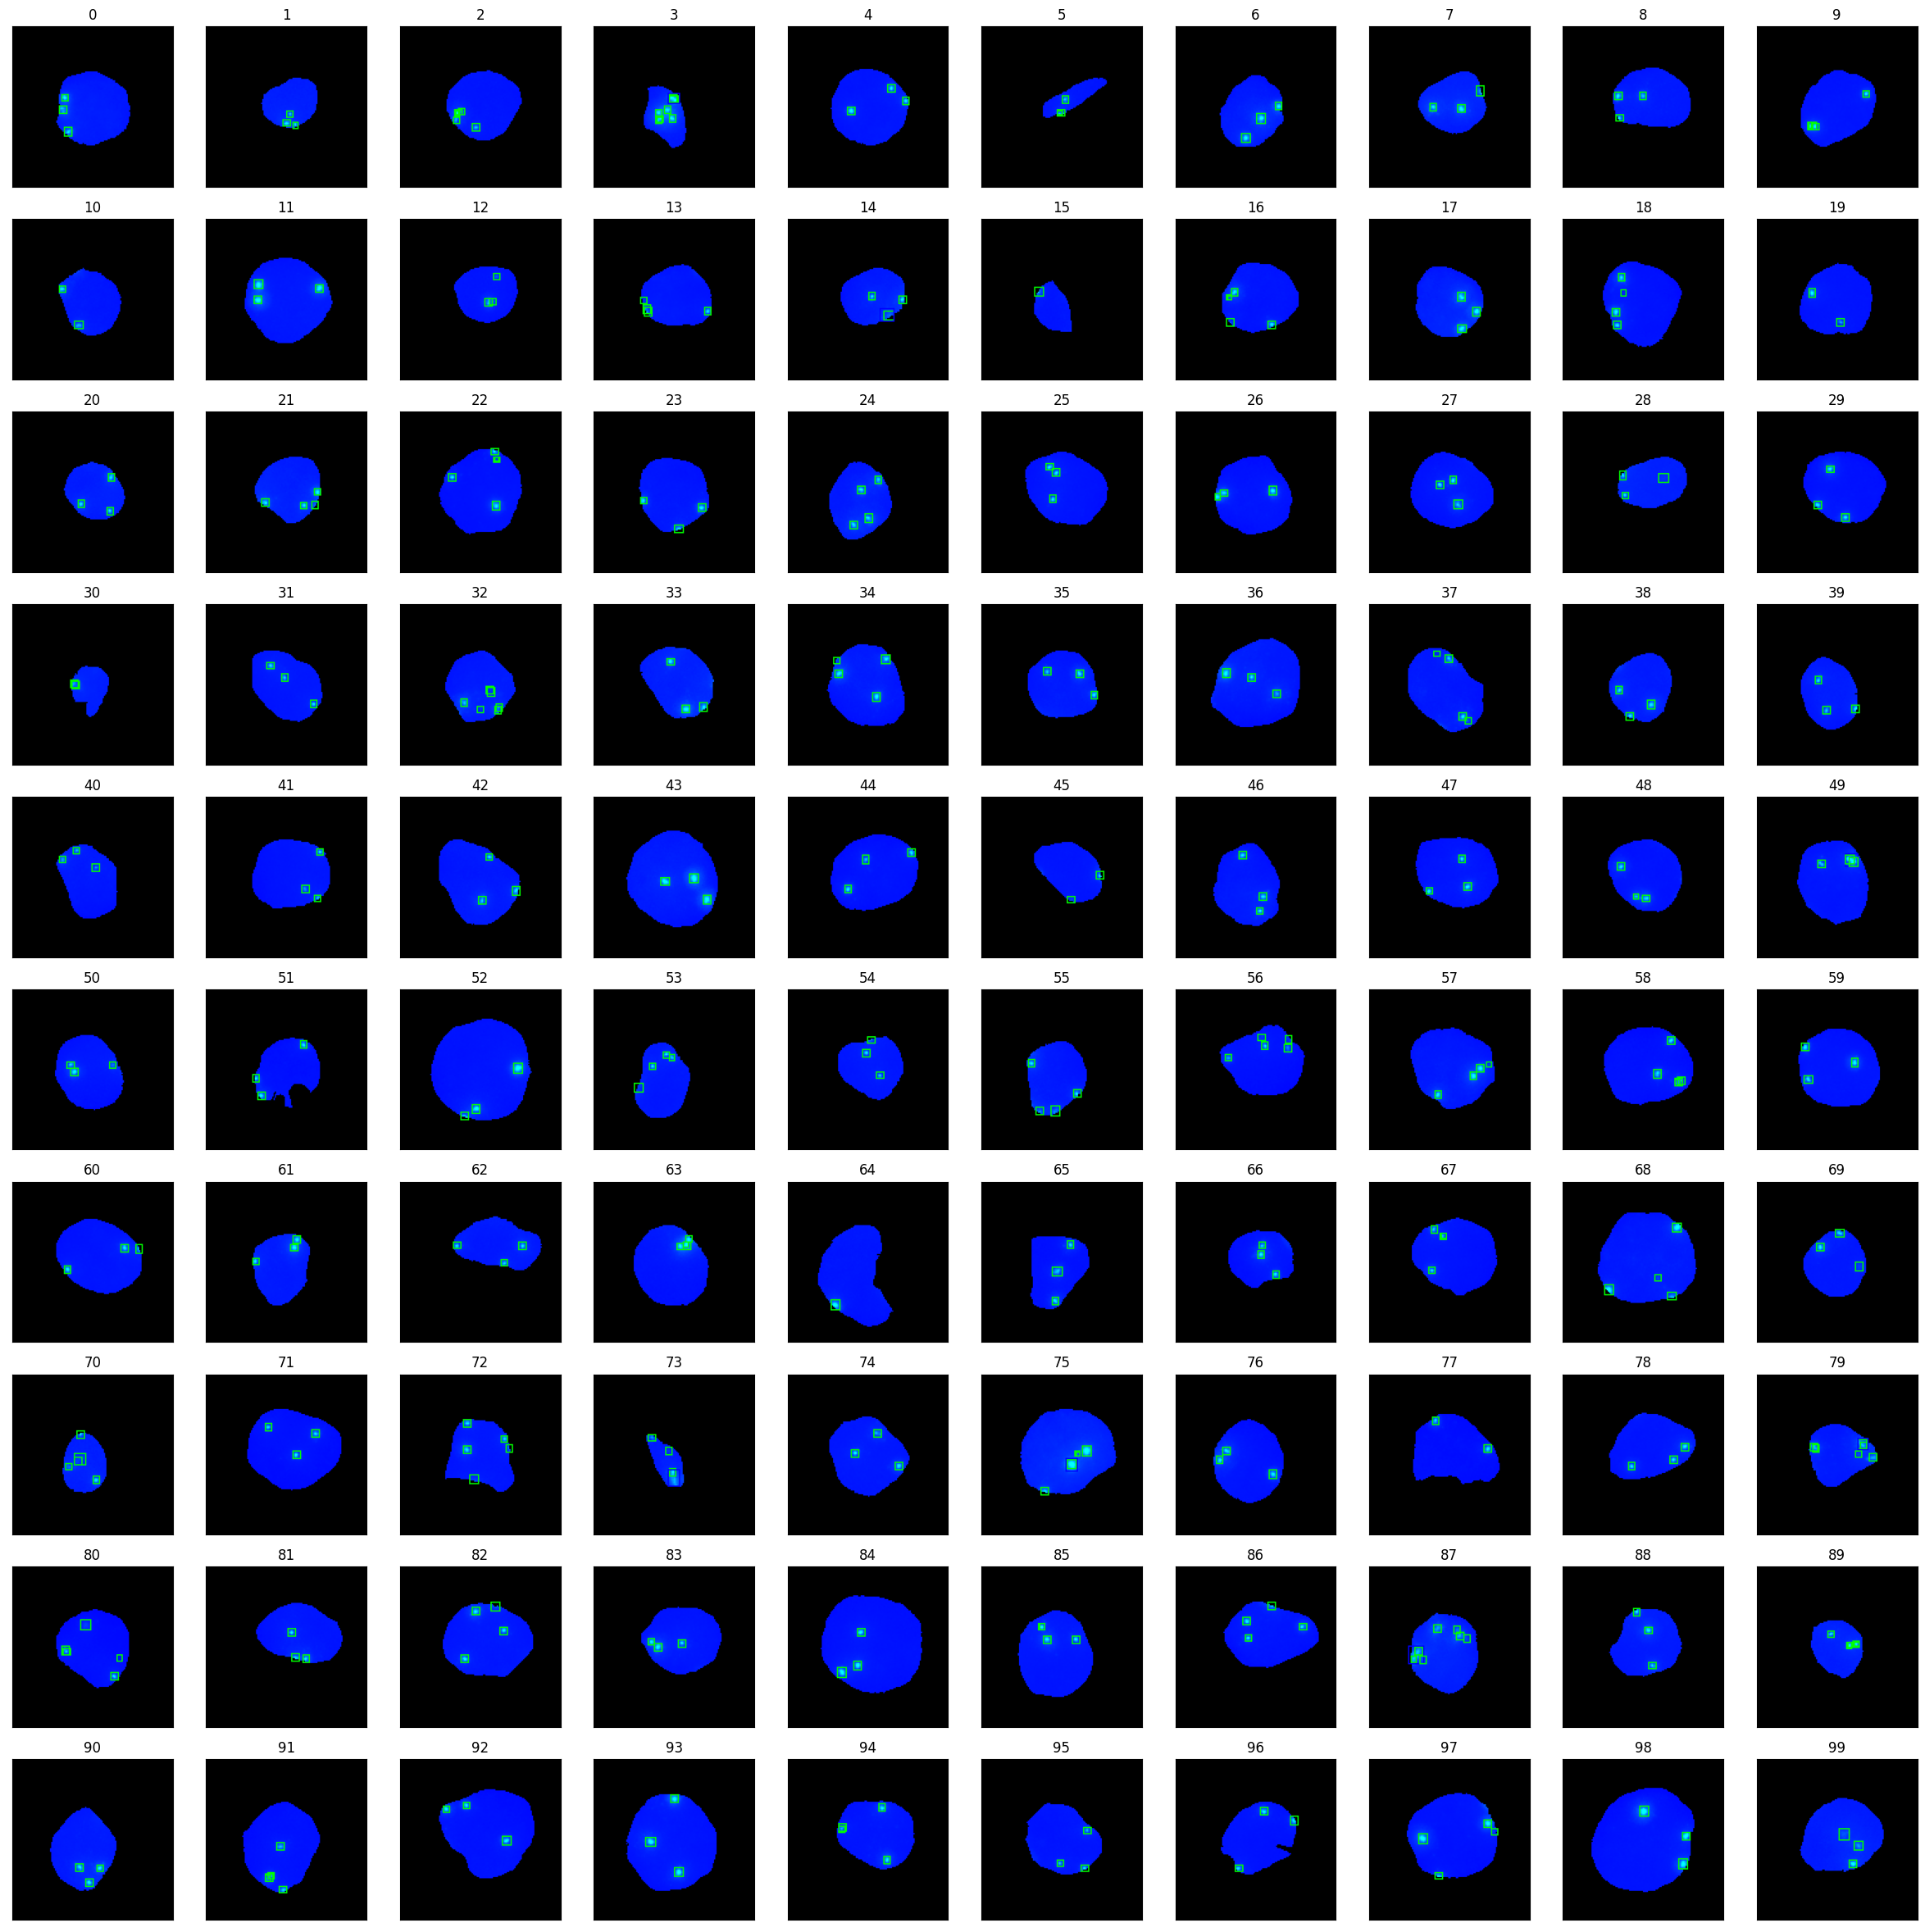

In [35]:
model.to(device)
model.eval()

ims = []
for X, y in tqdm(dataloader):
    pred = [{k: v.cpu().detach().numpy() for k,v in pred.items()} for pred in model(X.to(device))]
    for im, dic in zip(X, pred):
        dic["image"] = im
    ims.extend([bbox_on_image(pred_dict, ret=True, threshold=.5) for pred_dict in pred])
    if len(ims) >= 500:
        break

gridPlot(ims, sz=(10,10))

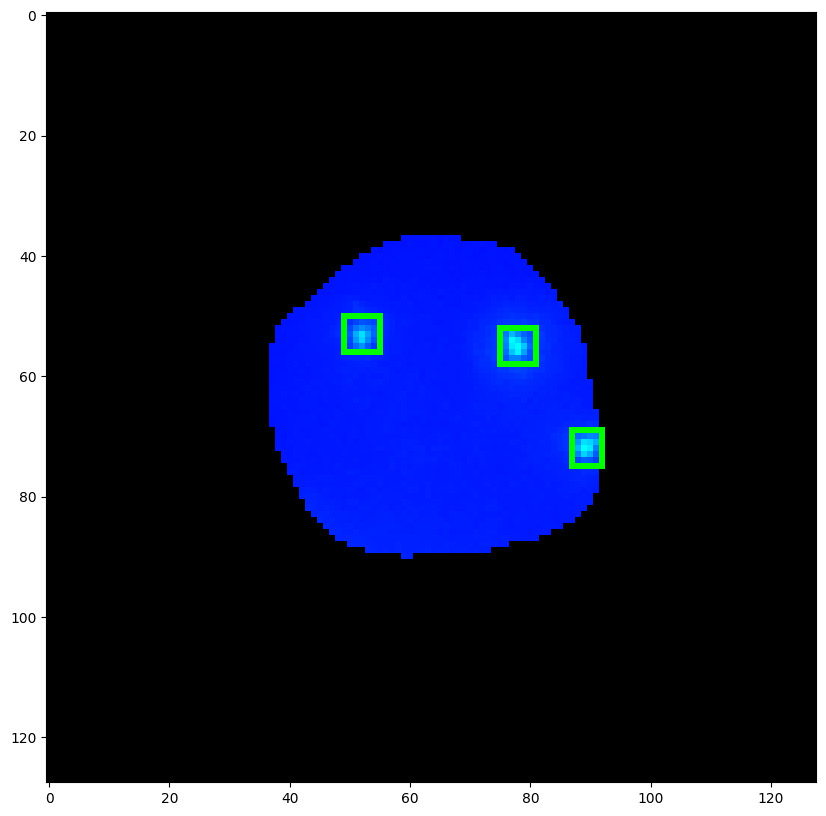

In [36]:
plt.rcParams["figure.figsize"] = 10,10
plt.imshow(ims[35])
plt.show()

In [ ]:
name = "overexposed_negative"
idx = 168
tmp = ims[idx].copy()
mask = tmp[...,2] == 0
tmp[mask] = 255
plt.imshow(tmp)
plt.imsave(f'/home/simon_g/src/results/images/white_{name}.png', tmp, dpi=500)   
plt.imsave(f'/home/simon_g/src/results/images/{name}.png', ims[idx], dpi=500)        
im = Image.fromarray(ims[idx]).convert('CMYK')
im.save(f'/home/simon_g/src/results/images/white_{name}.eps', dpi=500)                                    

In [ ]:
import numpy as np
from PIL import Image
for n, c in enumerate(["R", "G", "B"]):
    tmp = np.zeros_like(ims[idx])
    tmp[..., n] = ims[idx][..., n].astype(int)
    white = tmp.copy()
    white[mask, :] = 255
    im = Image.fromarray(tmp).convert('CMYK')
    im.save(f'/home/simon_g/src/results/images/white_{name}_{c}.jpeg')
    plt.imsave(f'/home/simon_g/src/results/images/white_{name}_{c}.png', white, dpi=500)                                             
    plt.imsave(f'/home/simon_g/src/results/images/{name}_{c}.png', tmp, dpi=500)                                             